# **Autoencoders**

### Dr. Santosh Chapaneri
### Lead AI Product Engineer, Wolters Kluwer

# **Autoencoders**

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, add
from keras.layers import Layer, Dense, Dropout, Activation, Flatten, Reshape
from keras import regularizers
from keras.regularizers import l2
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from tensorflow.keras.utils import to_categorical

We don't need the labels as the autoencoders are unsupervised network

In [2]:
(X_train, _), (X_test, _) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [3]:
X_train.shape

(60000, 28, 28, 1)

Normalize the data

We want the pixels values between 0 and 1 instead of between 0 and 255

In [4]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


Flatten the images for the Fully-Connected Networks

In [5]:
X_train = X_train.reshape(( len(X_train), np.prod(X_train.shape[1:]) ))

X_test = X_test.reshape(( len(X_test), np.prod(X_train.shape[1:]) ))

**Autoencoder**

In [6]:
input_size = 784
hidden_size = 64
output_size = 784

In [7]:
x = Input(shape=(input_size,))
h = Dense(hidden_size, activation='relu')(x)
r = Dense(output_size, activation='sigmoid')(h)


autoencoder = Model(inputs=x,outputs=r)

autoencoder.compile(optimizer='adam', loss='mse')

In [8]:
!pip install pydot
!pip install graphviz


[notice] A new release of pip is available: 23.1.2 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


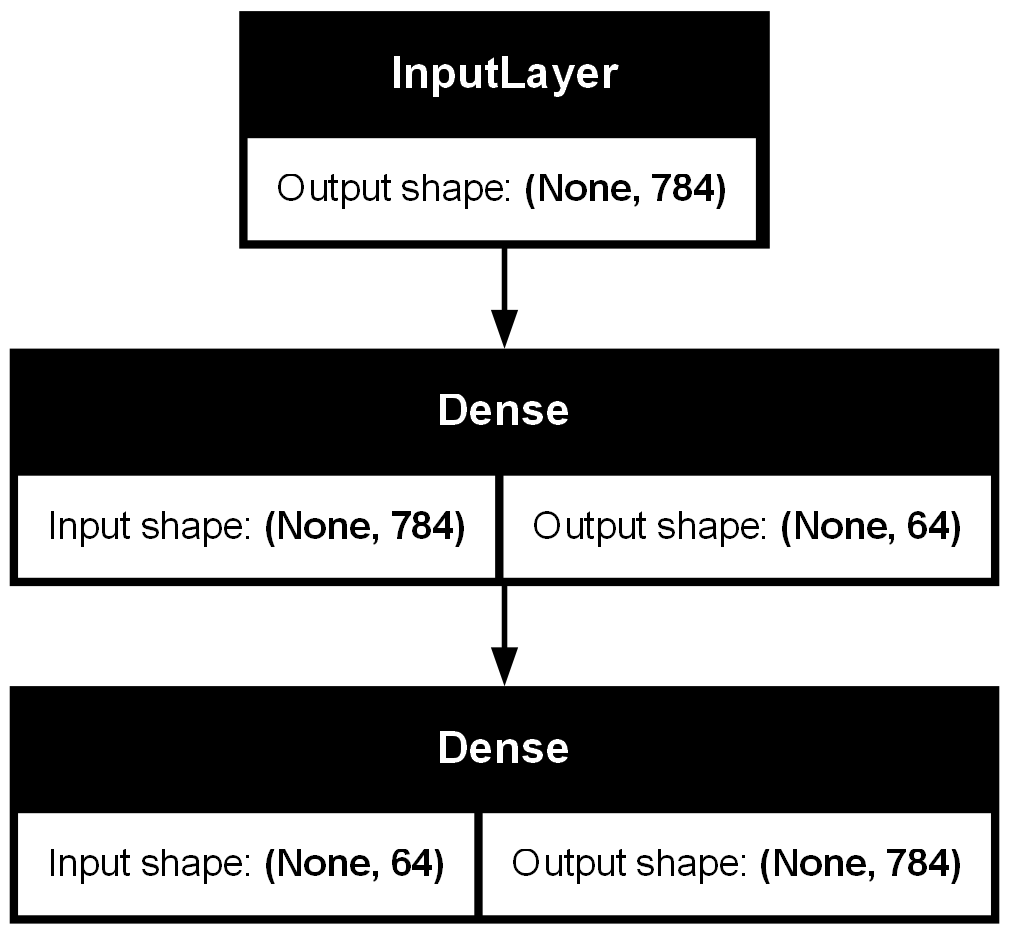

In [9]:
from IPython.display import SVG
from tensorflow.keras.utils import plot_model
import pydot

plot_model(autoencoder, to_file='model.png', show_shapes=True)

In [10]:
epochs = 5
batch_size = 128

history = autoencoder.fit(
    X_train,
    X_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(X_test, X_test)
    )

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0453 - val_loss: 0.0227
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0171 - val_loss: 0.0126
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0106 - val_loss: 0.0085
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0076 - val_loss: 0.0065
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0061 - val_loss: 0.0054


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step


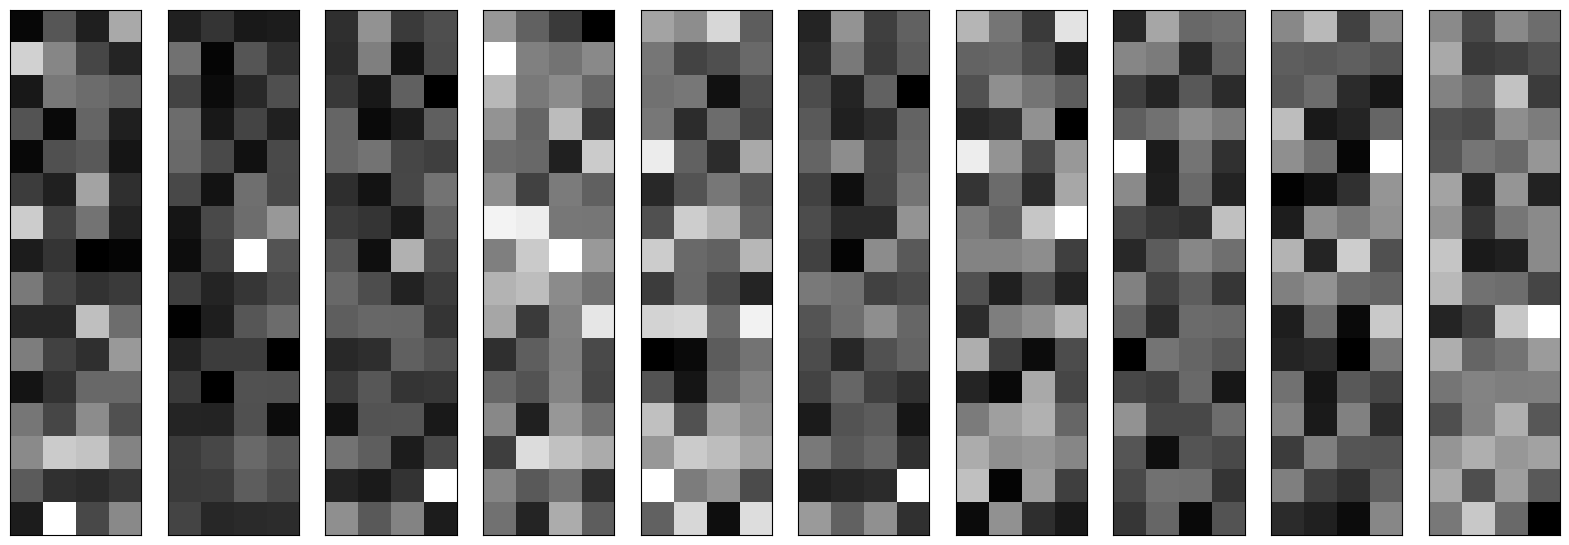

In [11]:
# without training
encoder = Model(x,h)
encoded_imgs = encoder.predict(X_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs[i].reshape(4, 16).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [12]:
# via trained model
decoded_imgs = autoencoder.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step


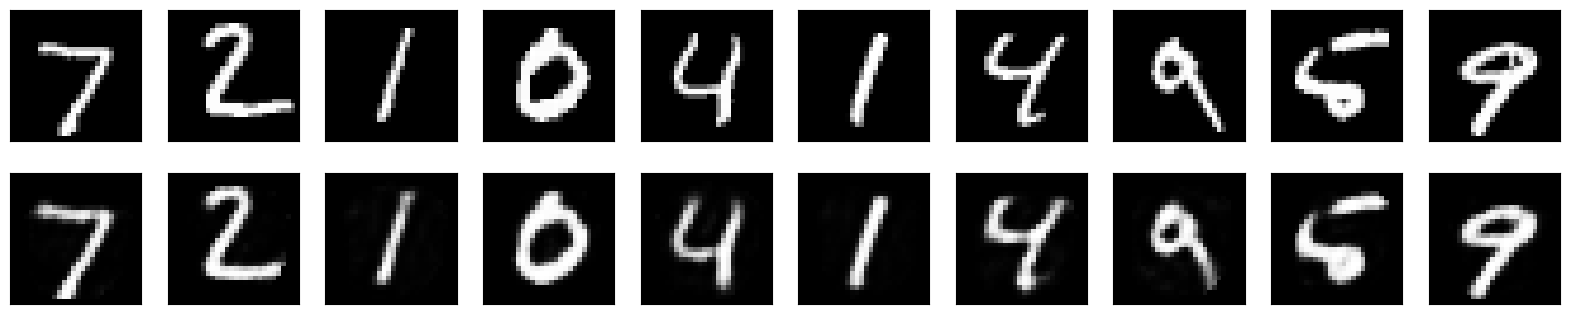

In [13]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

dict_keys(['loss', 'val_loss'])


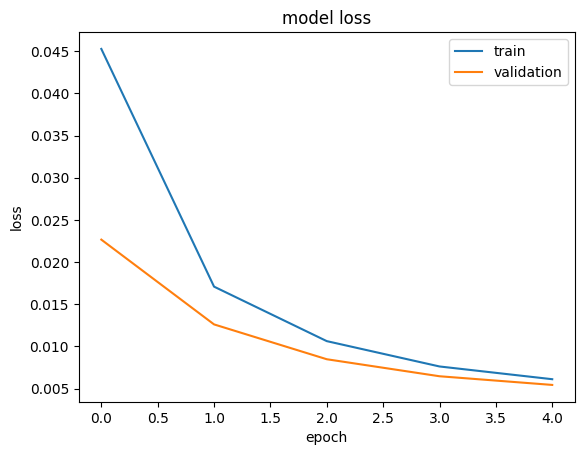

In [14]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# **Multilayer autoencoder**

We extend the idea of the first network to more layers

In [15]:
input_size = 784
hidden_size = 128
code_size = 64

x = Input(shape=(input_size,))

hidden_1 = None
hidden_1 = Dense(hidden_size, activation='relu')(x)

h=Dense(code_size, activation='relu')(hidden_1)#encoder output

hidden_2 = Dense(code_size, activation='relu')(h)#decoder output

r = Dense(input_size, activation='sigmoid')(hidden_2)

# autoencoder = Model(inputs=x,outputs=r)

ml_autoencoder = Model(inputs=x,outputs=r)

ml_autoencoder.compile(optimizer='adam', loss='mse')

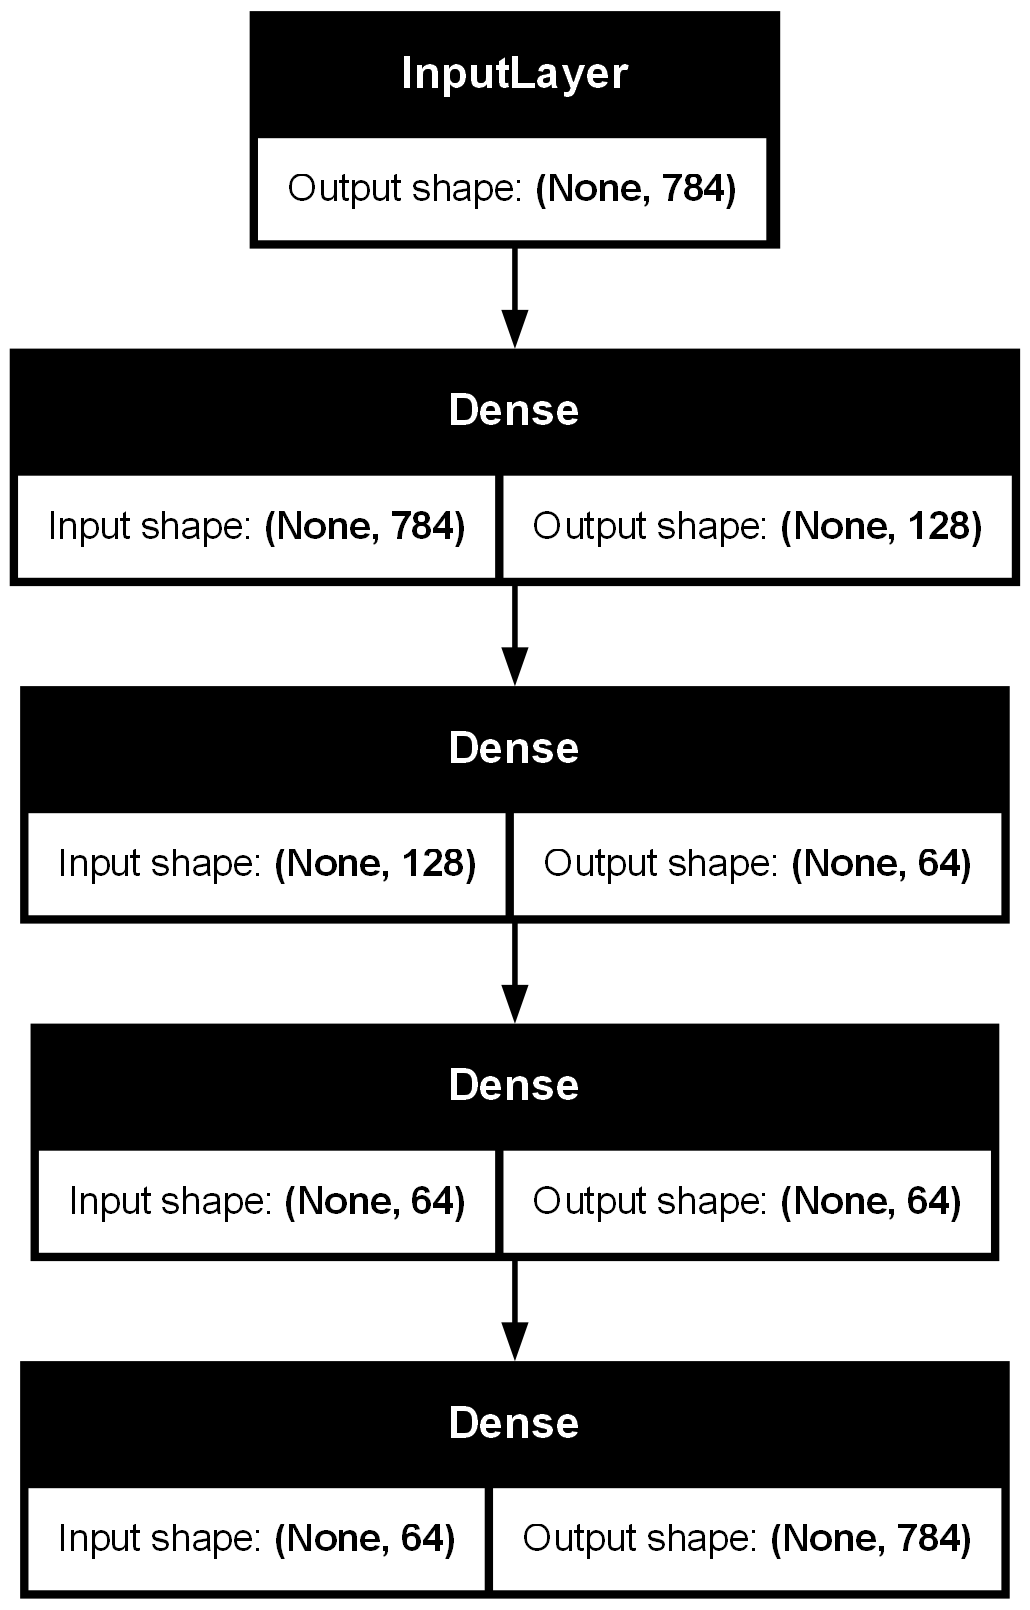

In [16]:
plot_model(ml_autoencoder, to_file='../../gen_data/model.png', show_shapes=True)

In [17]:
epochs = 5
batch_size = 128

history = ml_autoencoder.fit(
    X_train,
    X_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(X_test, X_test)
    )

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0452 - val_loss: 0.0222
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0184 - val_loss: 0.0152
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0142 - val_loss: 0.0126
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0121 - val_loss: 0.0110
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0108 - val_loss: 0.0099


In [18]:
decoded_imgs = ml_autoencoder.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step


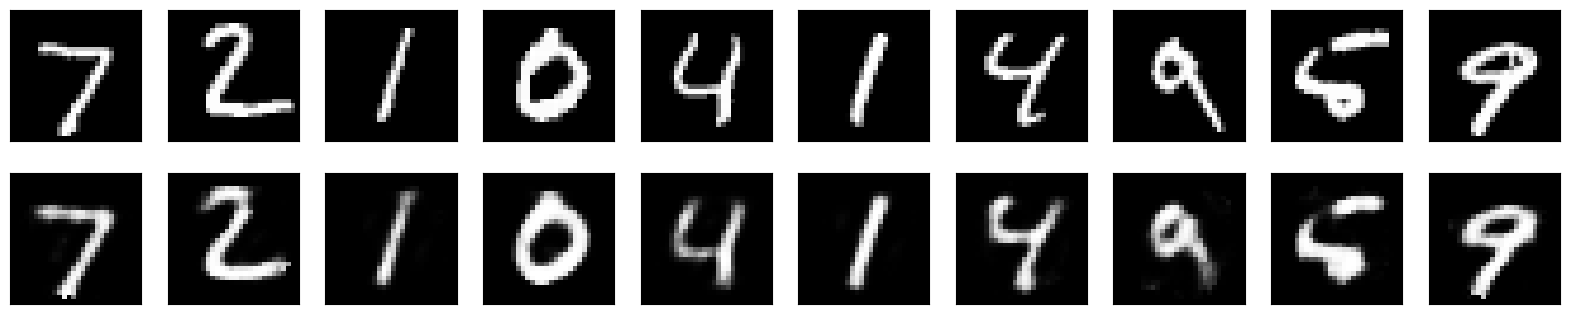

In [19]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

dict_keys(['loss', 'val_loss'])


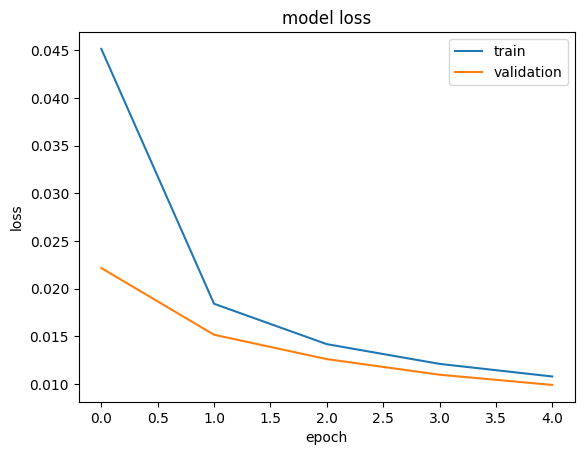

In [20]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# **Sparse autoencoder**

In [21]:
#corre cted code

import keras
import numpy as np
import tensorflow as tf
from keras.layers import Layer

class SparseLossLayer(Layer):
    def __init__(self, sparsity_level=0.05, lambda_sparse=0.1, **kwargs):
        super(SparseLossLayer, self).__init__(**kwargs)
        self.sparsity_level = sparsity_level
        self.lambda_sparse = lambda_sparse

    def call(self, inputs):
        y_true, y_pred = inputs

        mse_loss = tf.reduce_mean(keras.losses.MeanSquaredError()(y_true,y_pred))

        # encoded representation using the encoder model
        hidden_layer_output = encoder(y_true)

        mean_activation = tf.reduce_mean(hidden_layer_output, axis=0)

        kl_divergence = tf.reduce_sum(
            self.sparsity_level * tf.math.log(self.sparsity_level / (mean_activation + 1e-10))
            + (1 - self.sparsity_level) * tf.math.log((self.sparsity_level) / (1 - mean_activation + 1e-10))
        )

        # add the loss to the model's losses
        self.add_loss(mse_loss + self.lambda_sparse * kl_divergence)

        return y_pred

In [22]:
inputs = Input(shape=(input_size,))

encoded = Dense(hidden_size, activation='relu')(inputs)

decoded = Dense(output_size, activation='sigmoid')(encoded)

sparse_loss_layer = SparseLossLayer(sparsity_level=0.5,lambda_sparse=0.1)

output = sparse_loss_layer([inputs, decoded])

sparse_autoencoder = keras.Model(inputs, output)

encoder = keras.Model(inputs, encoded)

# compile the model (no need to specify loss anymore)
sparse_autoencoder.compile(optimizer='adam')

In [24]:
# Reshape and flatten X_train and X_test
(X_train, _), (X_test, _) = mnist.load_data()

# Reshape to add channel dimension
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Normalize
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Flatten the images
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [25]:
# Train the autoencoder
history = sparse_autoencoder.fit(
    X_train,
    X_train,
    epochs=epochs,
    batch_size=batch_size,
    shuffle=True
    )

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.1594
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0724
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0645
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0604
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0563


In [26]:
# Reconstruct the inputs
reconstructed = sparse_autoencoder.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step


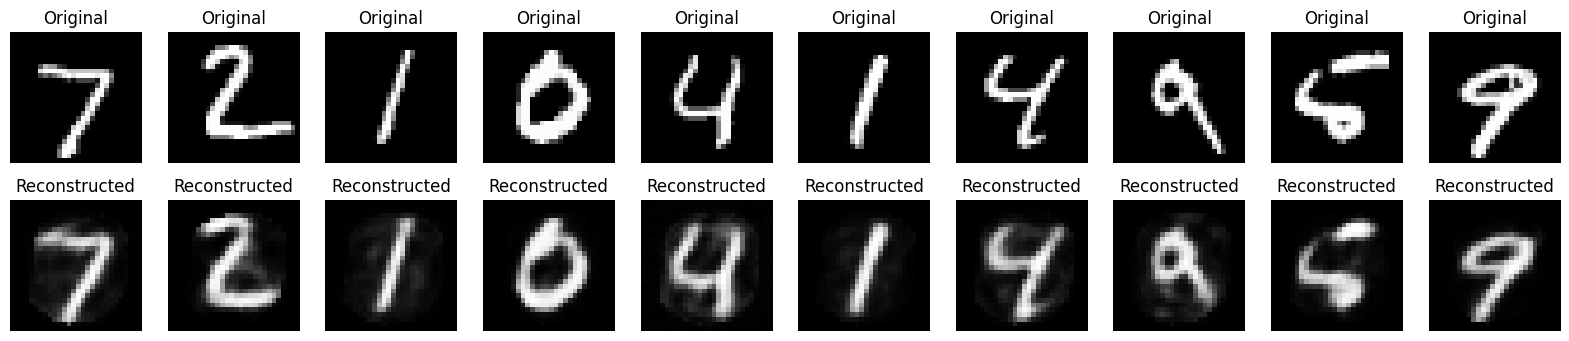

In [27]:
# Visualize original vs. reconstructed images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.show()